In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.layers import BatchNormalization
from keras.optimizers import Nadam
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Я убрал из таблицы значения которые как я думаю на прямую не могут влиять на уровень выживаемости.

In [8]:
df = df.drop('Cabin', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('PassengerId', axis=1)
df = df.drop('Embarked', axis=1)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000
887,1,1,female,19.0,0,0,112053,30.0000
888,0,3,female,NaN,1,2,W./C. 6607,23.4500
889,1,1,male,26.0,0,0,111369,30.0000


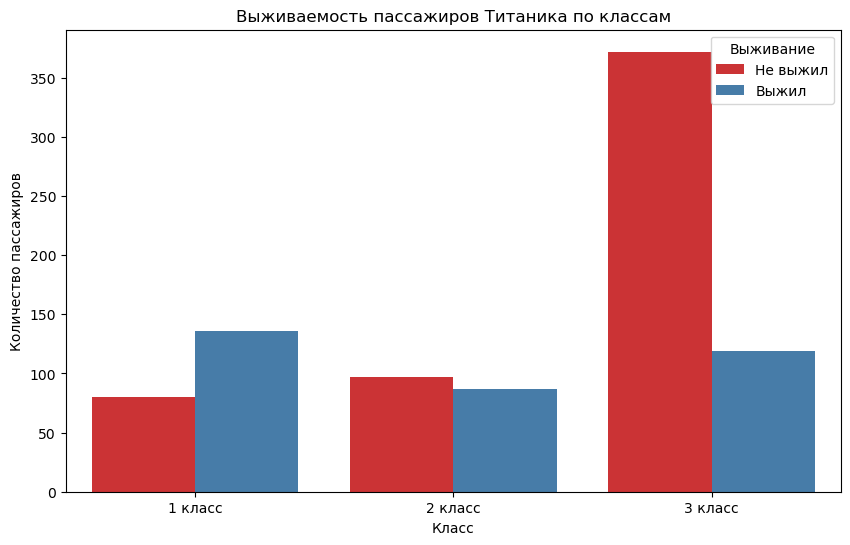

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')

# Заголовок и метки
plt.title('Выживаемость пассажиров Титаника по классам')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.xticks([0, 1, 2], ['1 класс', '2 класс', '3 класс'])  # Измените метки классов по необходимости
plt.legend(title='Выживание', loc='upper right', labels=['Не выжил', 'Выжил'])

# Показать график
plt.show()

Как видно из графика класс пассажира напрямую влияет на шансы выживания. 
Пассажиры первого класса выживают чаще чем погибают.
Погибших второго класса немного больше чем выживших.
ПОгибших первого класса почти в 3 раза больше чем выживших.

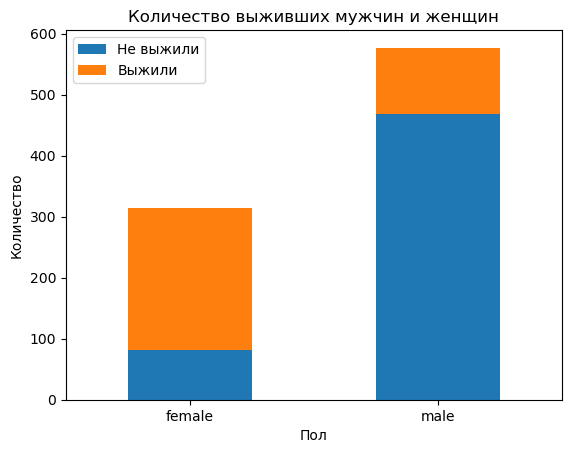

In [13]:
summary = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Создание графика
summary.plot(kind='bar', stacked=True)
plt.title('Количество выживших мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.legend(['Не выжили', 'Выжили'])
plt.show()

На графике видно, что женщин выжило больше чем мужчин.
Я жумаю это связано с тем, что во время всех происшествий спасают в первую очередь женщин и детей. 

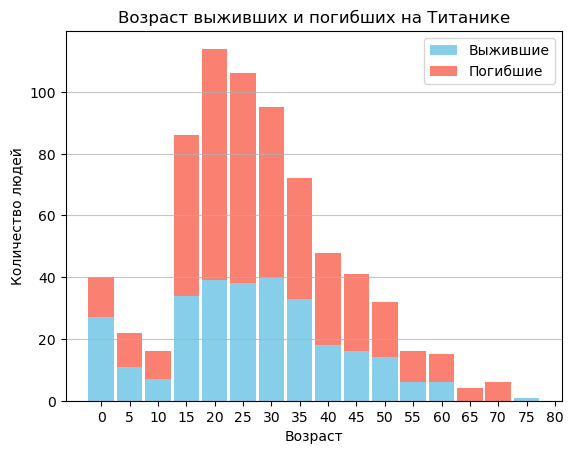

In [16]:
# Установка количества бинов
bins = range(0, 81, 5)

# Подсчет количества выживших и погибших по возрасту
survived_counts, _ = np.histogram(df[df['Survived'] == 1]['Age'], bins=bins)
deceased_counts, _ = np.histogram(df[df['Survived'] == 0]['Age'], bins=bins)

# Построение столбиков для выживших и погибших
plt.bar(bins[:-1], survived_counts, width=4.5, color='skyblue', label='Выжившие')
plt.bar(bins[:-1], deceased_counts, width=4.5, bottom=survived_counts, color='salmon', label='Погибшие')

# Настройка графика
plt.title('Возраст выживших и погибших на Титанике')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.xticks(bins)  # Установка меток по оси X
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Как видно, есть некие аномалии, так как некоторые возраста не заполнены в таблице, тк. в таблице написаны null'ы. Давайте их заполним

In [19]:
df['Age'].fillna(df['Age'].median(),inplace = True)

C:\Users\1sder\AppData\Local\Temp\ipykernel_22816\1750550615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace = True)


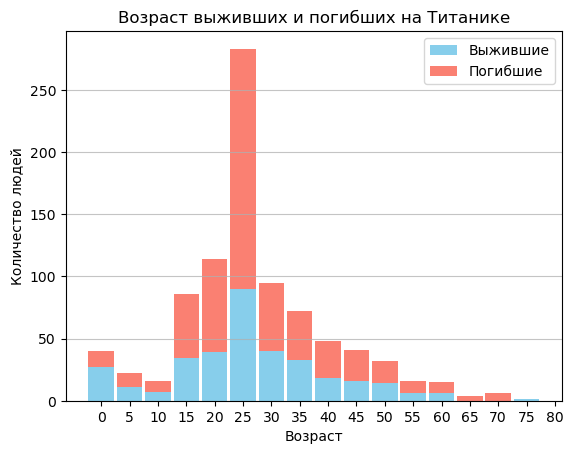

In [21]:
# Установка количества бинов
bins = range(0, 81, 5)

# Подсчет количества выживших и погибших по возрасту
survived_counts, _ = np.histogram(df[df['Survived'] == 1]['Age'], bins=bins)
deceased_counts, _ = np.histogram(df[df['Survived'] == 0]['Age'], bins=bins)

# Построение столбиков для выживших и погибших
plt.bar(bins[:-1], survived_counts, width=4.5, color='skyblue', label='Выжившие')
plt.bar(bins[:-1], deceased_counts, width=4.5, bottom=survived_counts, color='salmon', label='Погибшие')

# Настройка графика
plt.title('Возраст выживших и погибших на Титанике')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.xticks(bins)  # Установка меток по оси X
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

Теперь видно, что чаще выживали именно дети и люди среднего возраста в 25 лет

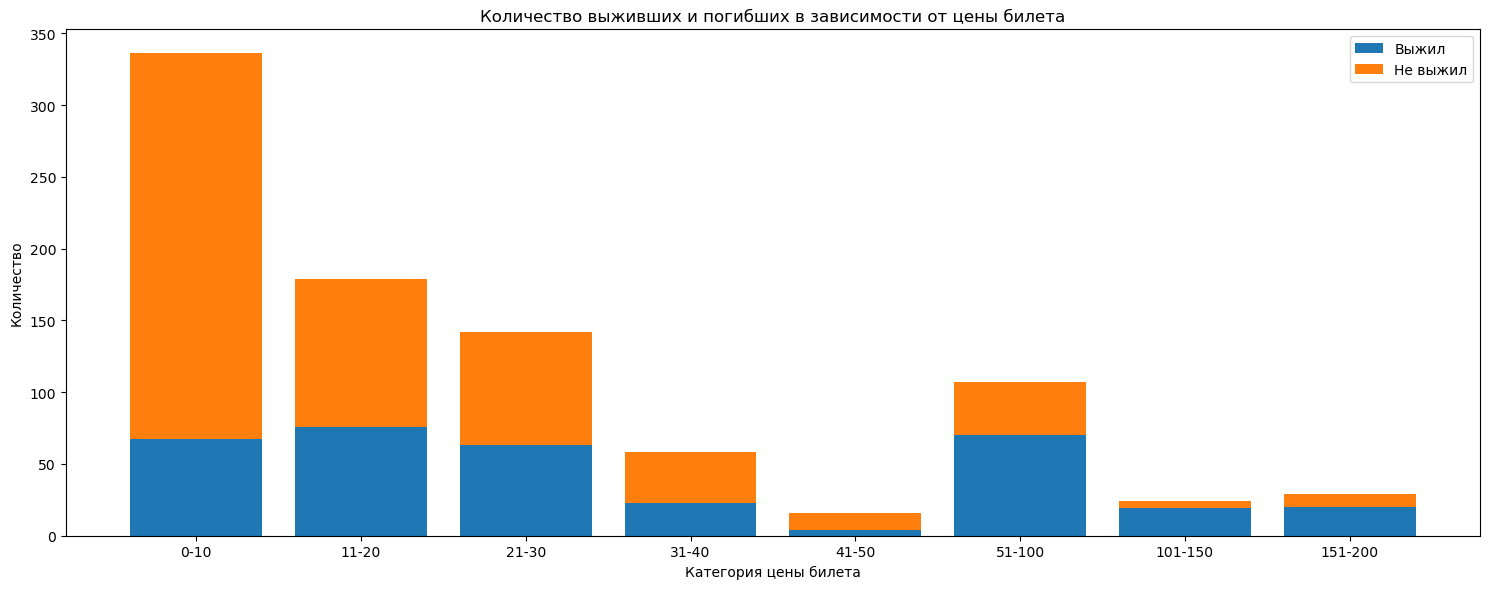

In [24]:
# Определяем функцию для более мелкой категории цены
def ticket_category(fare):
    if fare <= 10:
        return '0-10'
    elif fare <= 20:
        return '11-20'
    elif fare <= 30:
        return '21-30'
    elif fare <= 40:
        return '31-40'
    elif fare <= 50:
        return '41-50'
    elif fare <= 100:
        return '51-100'
    elif fare <= 150:
        return '101-150'
    else:
        return '151-200'

# Разделяем данные на выживших и погибших
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Создаем словарь для хранения данных
data = {}

for category in ['0-10', '11-20', '21-30', '31-40', '41-50', '51-100', '101-150', '151-200']:
    survived_count = len(survived[survived['Fare'].apply(ticket_category) == category])
    not_survived_count = len(not_survived[not_survived['Fare'].apply(ticket_category) == category])
    
    data[category] = {'Survived': survived_count, 'Not Survived': not_survived_count}

# Создаем столбчатый график
plt.figure(figsize=(15, 6))
x = list(data.keys())
y1 = [data[key]['Survived'] for key in x]
y2 = [data[key]['Not Survived'] for key in x]

plt.bar(x, y1, label='Выжил')
plt.bar(x, y2, bottom=y1, label='Не выжил')

plt.xlabel('Категория цены билета')
plt.ylabel('Количество')
plt.title('Количество выживших и погибших в зависимости от цены билета')
plt.legend()

plt.tight_layout()
plt.show()

Как видно чаще всего выживали люди у которых был билет подороже.

In [27]:
categorial_cols = df.select_dtypes(include=['object']).columns
label_encoders={}
for col in categorial_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Изменил все буквенные выражения на цифровые

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,22.0,1,0,523,7.2500
1,1,1,0,38.0,1,0,596,71.2833
2,1,3,0,26.0,0,0,669,7.9250
3,1,1,0,35.0,1,0,49,53.1000
4,0,3,1,35.0,0,0,472,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000
887,1,1,0,19.0,0,0,14,30.0000
888,0,3,0,28.0,1,2,675,23.4500
889,1,1,1,26.0,0,0,8,30.0000


In [32]:
X = df.drop(columns=['Survived'])
y = df['Survived']

Epoch 1/25


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6281 - loss: 0.6685 - val_accuracy: 0.6053 - val_loss: 0.5819
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - loss: 0.5414 - val_accuracy: 0.8421 - val_loss: 0.4922
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8328 - loss: 0.4955 - val_accuracy: 0.8772 - val_loss: 0.4458
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.4869 - val_accuracy: 0.8772 - val_loss: 0.4143
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.4651 - val_accuracy: 0.8596 - val_loss: 0.3949
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8007 - loss: 0.4240 - val_accuracy: 0.8421 - val_loss: 0.3939
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8503 - loss: 0.3993 - val_accuracy: 0.8596 - val_loss: 0.3886
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8243 - loss: 0.3847 - val_accuracy: 0.8421 - val_loss: 0.3881
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

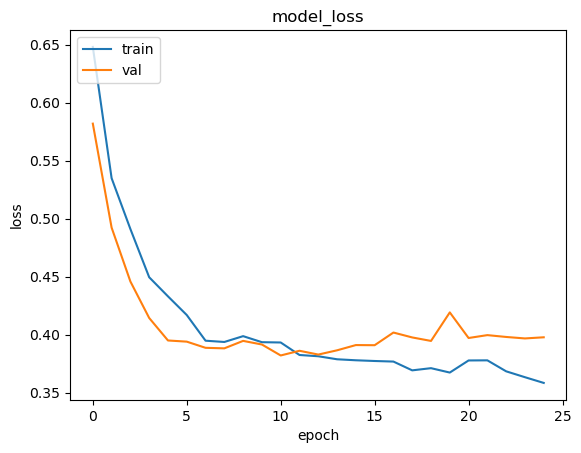

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 25, batch_size = 32, validation_split = 0.15)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/30


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4890 - loss: 0.6914 - val_accuracy: 0.7719 - val_loss: 0.6371
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7449 - loss: 0.6343 - val_accuracy: 0.8421 - val_loss: 0.5714
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8257 - loss: 0.5592 - val_accuracy: 0.8421 - val_loss: 0.4950
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.4825 - val_accuracy: 0.8333 - val_loss: 0.4051
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8031 - loss: 0.4260 - val_accuracy: 0.8158 - val_loss: 0.4379
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8229 - loss: 0.4360 - val_accuracy: 0.8509 - val_loss: 0.3932
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8360 - loss: 0.4043 - val_accuracy: 0.8509 - val_loss: 0.3952
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8272 - loss: 0.4056 - val_accuracy: 0.8509 - val_loss: 0.3778
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

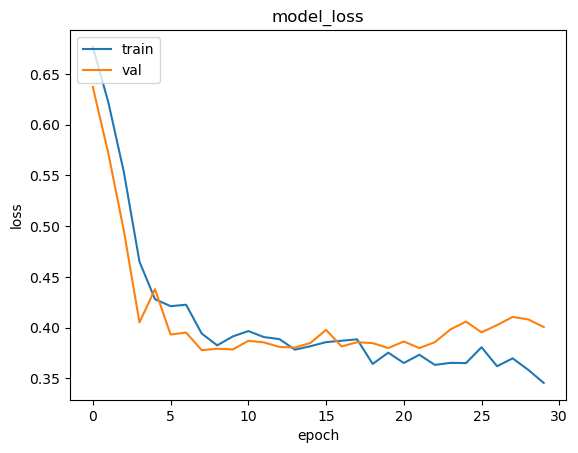

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.15)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/30


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6378 - loss: 0.6802 - val_accuracy: 0.6053 - val_loss: 0.6324
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6757 - loss: 0.5872 - val_accuracy: 0.7456 - val_loss: 0.5281
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7446 - loss: 0.5397 - val_accuracy: 0.8421 - val_loss: 0.4620
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7961 - loss: 0.4741 - val_accuracy: 0.8333 - val_loss: 0.4110
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4588 - val_accuracy: 0.8421 - val_loss: 0.4025
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8057 - loss: 0.4504 - val_accuracy: 0.8421 - val_loss: 0.3999
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8095 - loss: 0.4122 - val_accuracy: 0.8596 - val_loss: 0.3960
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8248 - loss: 0.4021 - val_accuracy: 0.8596 - val_loss: 0.3893
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

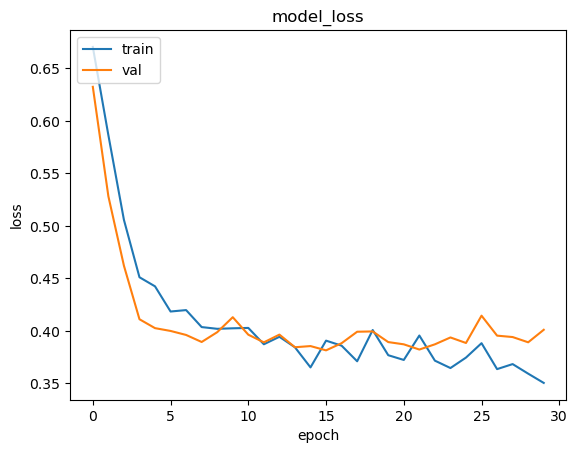

In [36]:
from tensorflow.keras.layers import Dropout

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.15)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/30


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6165 - loss: 0.6875 - val_accuracy: 0.7807 - val_loss: 0.6535
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7660 - loss: 0.6297 - val_accuracy: 0.8509 - val_loss: 0.5170
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7886 - loss: 0.4995 - val_accuracy: 0.8596 - val_loss: 0.4027
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8065 - loss: 0.4184 - val_accuracy: 0.8596 - val_loss: 0.4047
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8179 - loss: 0.4411 - val_accuracy: 0.8684 - val_loss: 0.3997
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: 0.4189 - val_accuracy: 0.8509 - val_loss: 0.4018
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.4422 - val_accuracy: 0.8596 - val_loss: 0.3948
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8304 - loss: 0.4075 - val_accuracy: 0.8509 - val_loss: 0.3819
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

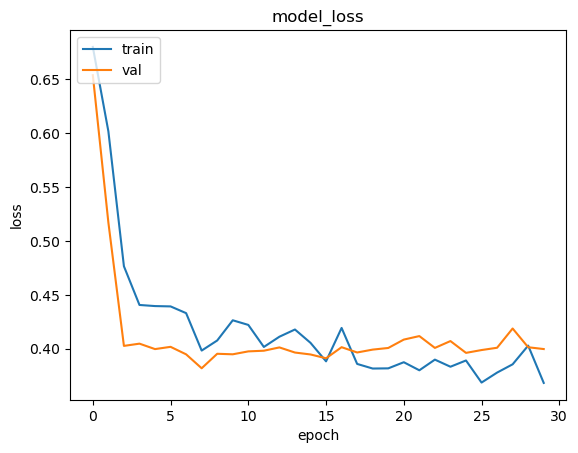

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_split = 0.15)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/35


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.5883 - loss: 0.6919 - val_accuracy: 0.6573 - val_loss: 0.6699
Epoch 2/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7184 - loss: 0.6536 - val_accuracy: 0.7483 - val_loss: 0.5674
Epoch 3/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7356 - loss: 0.5508 - val_accuracy: 0.8531 - val_loss: 0.4196
Epoch 4/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7881 - loss: 0.4809 - val_accuracy: 0.8811 - val_loss: 0.3719
Epoch 5/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8492 - loss: 0.4224 - val_accuracy: 0.8671 - val_loss: 0.3849
Epoch 6/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8341 - loss: 0.4141 - val_accuracy: 0.8252 - val_loss: 0.4037
Epoch 7/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8316 - loss: 0.4028 - val_accuracy: 0.8741 - val_loss: 0.3696
Epoch 8/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8140 - loss: 0.3984 - val_accuracy: 0.8462 - val_loss: 0.3745
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

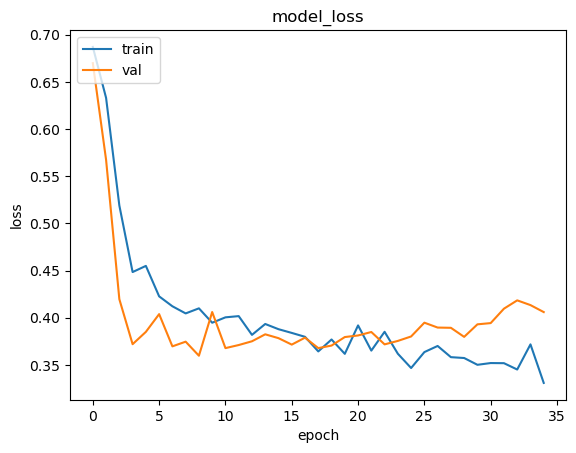

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 35, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

Epoch 1/35


E:\1\jypiter\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.5443 - loss: 0.6880 - val_accuracy: 0.5874 - val_loss: 0.6565
Epoch 2/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6417 - loss: 0.6288 - val_accuracy: 0.5874 - val_loss: 0.5508
Epoch 3/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7150 - loss: 0.5576 - val_accuracy: 0.8531 - val_loss: 0.4790
Epoch 4/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7829 - loss: 0.5051 - val_accuracy: 0.8811 - val_loss: 0.4169
Epoch 5/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7575 - loss: 0.5261 - val_accuracy: 0.8252 - val_loss: 0.4350
Epoch 6/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.4449 - val_accuracy: 0.8531 - val_loss: 0.3798
Epoch 7/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8098 - loss: 0.4537 - val_accuracy: 0.8531 - val_loss: 0.3934
Epoch 8/35
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8091 - loss: 0.4702 - val_accuracy: 0.8671 - val_loss: 0.3907
Ep

<function matplotlib.pyplot.show(close=None, block=None)>

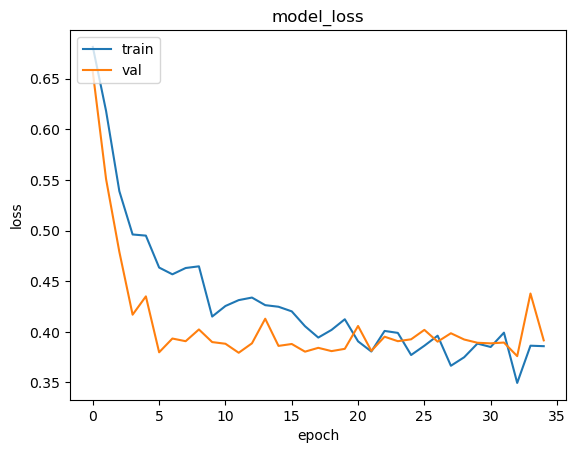

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = Nadam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 35, batch_size = 32, validation_split = 0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show

In [41]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix

# Объект KFold для кросс-валидации
kf = KFold(n_splits=3, shuffle=True, random_state=43)

# Переменная для хранения метрик
fold_metrics = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    # Используем .iloc для выбора строк по индексам
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    # Масштабирование тестового фолда
    X_test = scaler.transform(X_test)  # Только transform, так как scaler уже обучен

    # Предсказание на текущем тестовом фолде
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Печать метрик для фолда
    print(f"Fold {fold}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Сохранение метрик
    fold_metrics.append((classification_report(y_test, y_pred, output_dict=True), confusion_matrix(y_test, y_pred)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fold 1
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       184
           1       0.77      0.72      0.74       113

    accuracy                           0.81       297
   macro avg       0.80      0.79      0.80       297
weighted avg       0.81      0.81      0.81       297

Confusion Matrix:
 [[160  24]
 [ 32  81]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 2
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       184
           1       0.77      0.81      0.79       113

    accuracy                           0.84       297
   macro avg       0.83      0.83      0.83       297
weighted avg       0.84      0.84      0.84       297

Confusion Matrix:
 [[157  27]
 [ 21  92]]
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 3
Classification Report:
               precision    recall  f1-score   sup

In [ ]:
Итоговая модель, предсказывающая выживаемость пассажиров на Титанике, показывает следующие результаты по матрице ошибок: 
модель предсказала, что пассажиры не выживут, а на самом деле они выжили (ложно отрицательные) = 70 человек;
предсказала, что не выживут, и они действительно не выжили (истинно отрицательные) = 479 человек;
предсказала, что выживут, а на самом деле не выжили (ложно положительные) = 77 человек;
предсказала, что выживут, и они действительно выжили (истинно положительные) = 265 человек.
Общая точность модели варьируется от 81% до 86%, что подтверждает её эффективность в классификации.
Однако высокое число ложных отрицательных предсказаний указывает на необходимость дальнейшего анализа и улучшений, особенно для класса "Выжил".